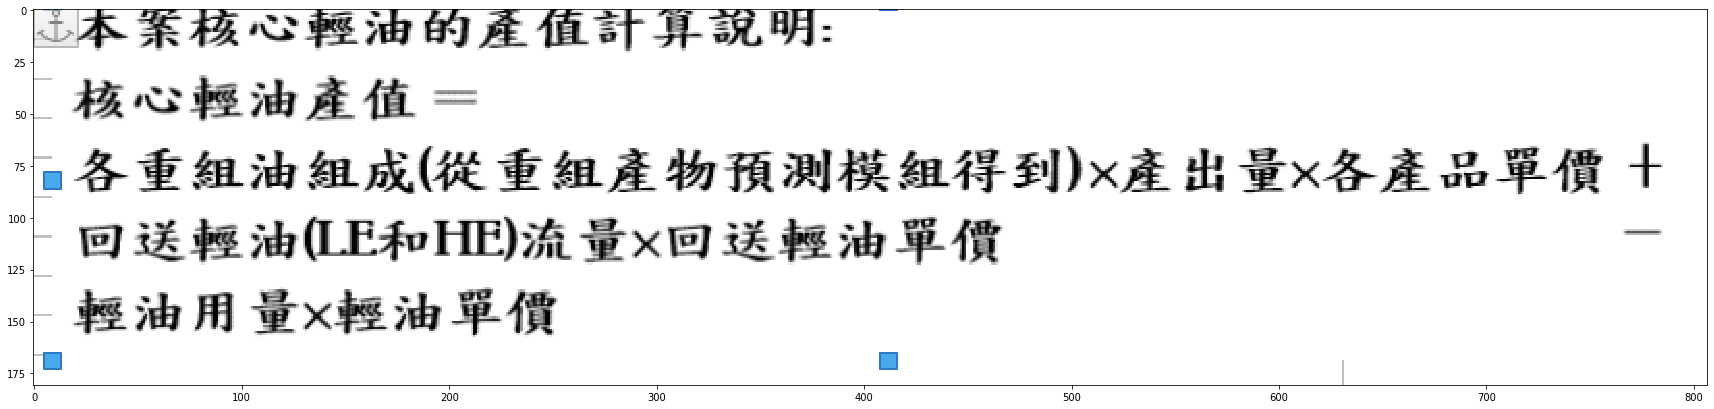

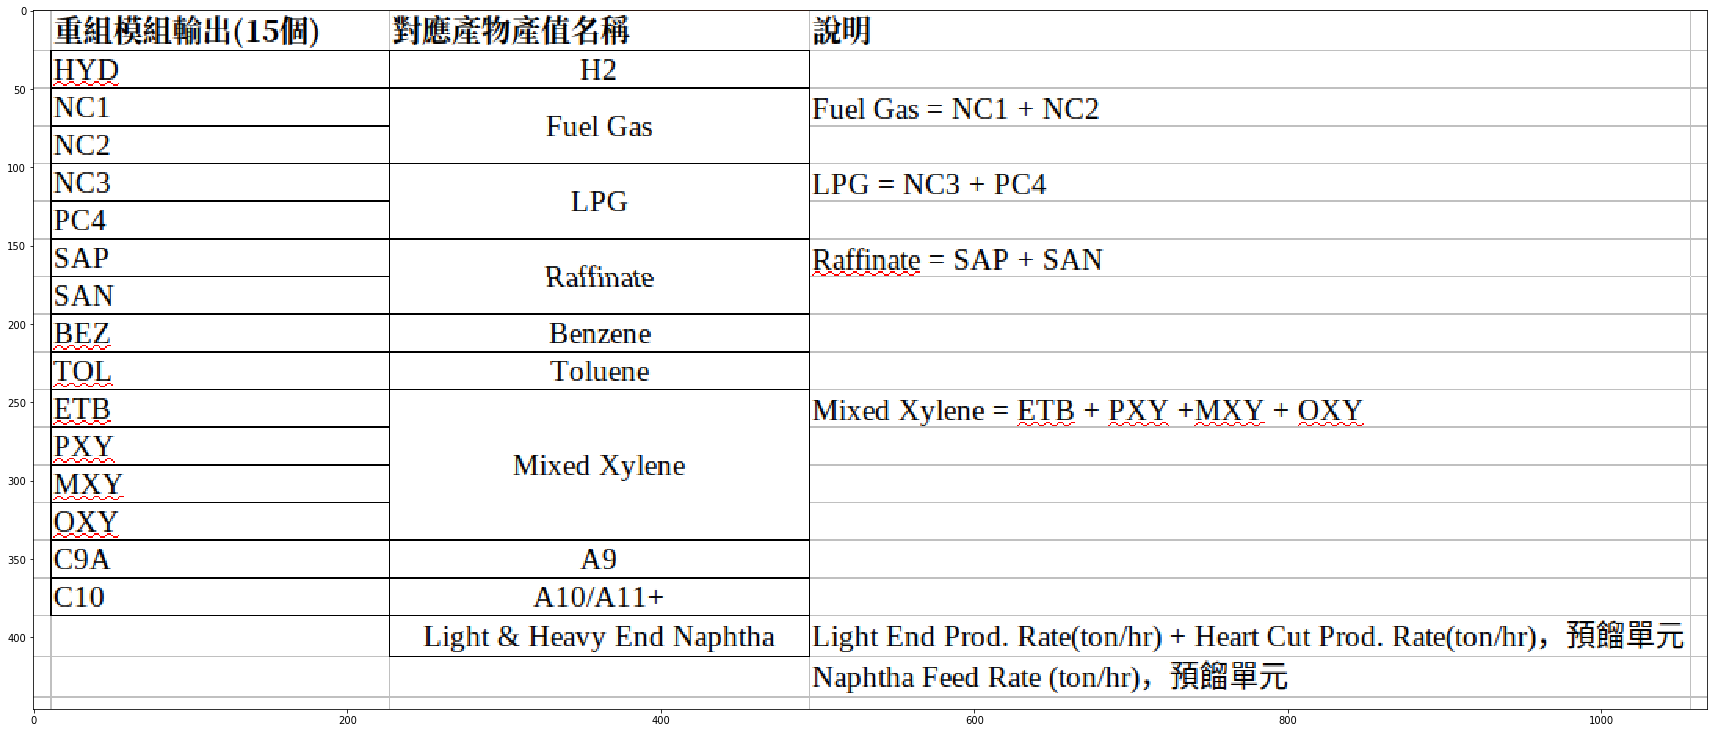

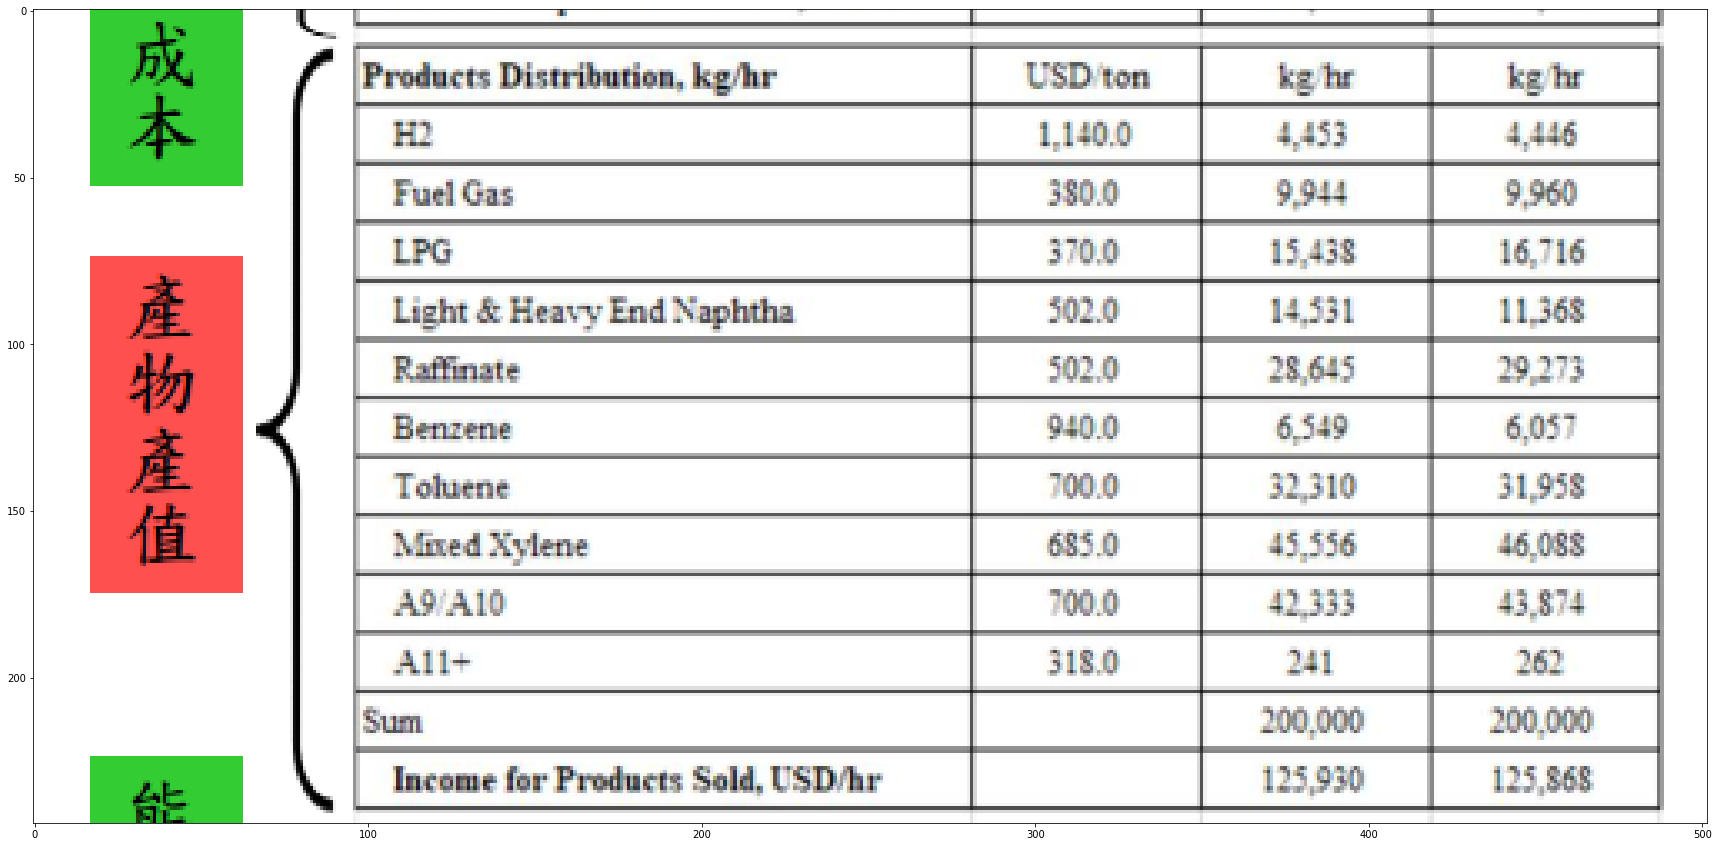

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib

for i in range(3):
    image = mpimg.imread("./img/Price{}.png".format(i+1))
    plt.figure(figsize = (30,30))
    plt.imshow(image)
    plt.show()

In [2]:
class Price_model:
    def __init__(self,各產品單價,回送輕油單價,輕油單價):
        self.各產品單價 = 各產品單價
        self.回送輕油單價 = 回送輕油單價
        self.輕油單價 = 輕油單價
    
    def compute_price(self,各重組油組成,產出量,回送輕油流量,輕油用量):
        total = 0
        total += (各重組油組成*產出量*self.各產品單價).sum() # (vector*scalar*vector).sum()
        total += 回送輕油流量*self.回送輕油單價 # scalar*scalar
        total -= 輕油用量*self.輕油單價 # scalar*scalar
        return total

In [3]:
各產品單價 = np.array([1140,380,380,370,370,502,502,940,700,685,685,685,685,700,318])
回送輕油單價 = 198.015
輕油單價 = 205.015
model = Price_model(各產品單價,回送輕油單價,輕油單價)

# test

In [4]:
batch_size = 3
各重組油組成 = np.random.uniform(size=(batch_size,15))
產出量 = np.random.uniform(size=(batch_size,1))
回送輕油流量 = np.random.uniform(size=(batch_size,1))
輕油用量 = np.random.uniform(size=(batch_size,1))
model.compute_price(各重組油組成,產出量,回送輕油流量,輕油用量)

array([[7706.13584916],
       [7899.80985844],
       [7709.38996651]])

# save

In [5]:
save_path = '../model/price_model.pkl'
joblib.dump(model,save_path)

['../model/price_model.pkl']